# 1. Algorithm's Basics

- **Created by Andrés Segura Tinoco**
- **Created on Dec 18, 2019**
- **Updated on May 18, 2021**

## Algorithms
In mathematics and computer science, an algorithm is a finite sequence of well-defined, computer-implementable instructions, typically to solve a class of problems or to perform a computation <a href="#link_one">[1]</a>.

In [1]:
# Load the Python libraries
import math
import random
import timeit
import numpy as np
from scipy import stats as sci
import statistics as stats
from itertools import cycle

In [2]:
# Load plotting libraries
import matplotlib.pyplot as plt

## 1.1. Greatest Common Divisor (GCD)

The greatest common divisor (GCD) of two or more integers, which are not all zero, is the largest positive integer that divides each of the integers. For two integers $ x, y $, the greatest common divisor of $x$ and $y$ is denoted $ gcd(x,y) $ <a href="#link_two">[2]</a>. For example, the GCD of 8 and 12 is 4, that is, $ gcd(8,12)=4 $.

In [3]:
# Example values
m = 12000000
n = 76000000

### 1.1.1. Simple approach

In [4]:
# Function that returns the GCD of two values (intuitive algorithn)
def gcd_simple(m, n):
    i = min(m, n)
    
    while (m % i != 0) or (n % i != 0):
        i -= 1
        
    return i

In [5]:
start_time = timeit.default_timer()
print(gcd_simple(m, n))
print('>> elapsed time', (timeit.default_timer() - start_time) * 1000, 'ms')

4000000
>> elapsed time 1080.9609 ms


### 1.1.2. Enhanced approach

In [6]:
# Function that returns the GCD of two values (euclidean algorithm)
def gcd_euclidean(m, n):
    m = min(m, n)
    n = max(m, n)
    
    while m > 0:
        t = m
        m = n % m
        n = t
    
    return n

In [7]:
start_time = timeit.default_timer()
print(gcd_euclidean(m, n))
print('>> elapsed time', (timeit.default_timer() - start_time) * 1000, 'ms')

4000000
>> elapsed time 1.6196000000001654 ms


## 1.2. Fibonacci Serie

In mathematics, the Fibonacci numbers, commonly denoted $ F_n $, form a sequence, called the Fibonacci sequence, such that each number is the sum of the two preceding ones, starting from 0 and 1. That is <a href="#link_three">[3]</a>,

$ \quad F_{0}=0,\quad F_{1}=1, $  
and  
$ \quad F_{n}=F_{n-1}+F_{n-2} $  
for n > 1.

The beginning of the sequence is thus:  
$ \quad 0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, ... $

In [8]:
# Example value
n = 35

### 1.2.1. Recursive algorithm

In [9]:
# Function that returns the n-fibonacci value (recursive algorithm)
def fibo_rec(n):
    if n < 2:
        return n
    else:
        return fibo_rec(n - 1) + fibo_rec(n - 2)

In [10]:
start_time = timeit.default_timer()
print(fibo_rec(n))
print('>> elapsed time', (timeit.default_timer() - start_time) * 1000, 'ms')

9227465
>> elapsed time 5066.8688 ms


### 1.2.2. Iterative algorithm

In [11]:
# Function that returns the n-fibonacci value (iterative algorithm)
def fibo_iter(n):
    i, j = 1, 0
    
    for k in range(n):
        j = i + j
        i = j - i
    
    return j

In [12]:
start_time = timeit.default_timer()
print(fibo_iter(n))
print('>> elapsed time', (timeit.default_timer() - start_time) * 1000, 'ms')

9227465
>> elapsed time 0.9330999999992429 ms


### 1.2.3. Approximation approach
With the De Moivre's formula:

$$ f_{n} = {\frac{1}{\sqrt{5}}}{[\phi^n -(-\phi)^{-n}]} \tag{1}, $$
$$ \phi = (1 + \sqrt{5})\,/\,2 $$

In [13]:
# Function that returns the n-fibonacci value (De Moivre equation)
def fibo_de_moivre(n):
    golden_ratio = (1 + 5**(1/2)) / 2
    f = (golden_ratio**n - (-golden_ratio)**(-n)) / 5**(1/2)
    return int(f)

In [14]:
start_time = timeit.default_timer()
print(fibo_de_moivre(n))
print('>> elapsed time', (timeit.default_timer() - start_time) * 1000, 'ms')

9227465
>> elapsed time 0.2905000000001934 ms


## 1.3. Integer Factorization

In number theory, integer factorization is the decomposition of a composite number into a product of smaller integers. If these factors are further restricted to prime numbers, the process is called prime factorization <a href="#link_four">[4]</a>.

In [15]:
# Example values
a, b = 104723, 104729
n = a * b
n

10967535067

In [16]:
# Function that returns the factorization of an integer (ascending approach)
def fact_int(n):
    nn = n**(1/2)
    m = 2
    
    while m < nn:
        if n % m == 0:
            return (m, n // m)
        m += 1
    
    return (1, n)

In [17]:
start_time = timeit.default_timer()
print(fact_int(n))
print('>> elapsed time', (timeit.default_timer() - start_time) * 1000, 'ms')

(104723, 104729)
>> elapsed time 82.78020000000019 ms


In [18]:
# Function that returns the factorization of an integer (descending approach)
def fact_int_2(n):
    nn = n**(1/2)
    m = int(nn)
    
    while m > 1:
        if n % m == 0:
            return (m, n // m)
        m -= 1
    
    return (1, n)

In [19]:
start_time = timeit.default_timer()
print(fact_int_2(n))
print('>> elapsed time', (timeit.default_timer() - start_time) * 1000, 'ms')

(104723, 104729)
>> elapsed time 0.9137999999992985 ms


## 1.4. Tower of Hanoi

The Tower of Hanoi is a mathematical game or puzzle. It consists of three rods and a number of disks of different sizes, which can slide onto any rod. The puzzle starts with the disks in a neat stack in ascending order of size on one rod, the smallest at the top, thus making a conical shape <a href="#link_five">[5]</a>.

In [20]:
# Disk number between 2 and 64 (not recommended)
n_disks = 5

### 1.4.1. The recursive and classic algorithm

In [21]:
# Move n disk from source to destination
def hanoi_rec(n, source, aux, target):
    if n > 0:
        hanoi_rec(n - 1, source, target, aux)
        print('Move disk', n, 'from:', source, 'to:', target)
        hanoi_rec(n - 1, aux, source, target)

In [22]:
start_time = timeit.default_timer()
print('>> number of movements:', (2**n_disks - 1))
hanoi_rec(n_disks, 'T1', 'T2', 'T3')
print('>> elapsed time', (timeit.default_timer() - start_time) * 1000, 'ms')

>> number of movements: 31
Move disk 1 from: T1 to: T3
Move disk 2 from: T1 to: T2
Move disk 1 from: T3 to: T2
Move disk 3 from: T1 to: T3
Move disk 1 from: T2 to: T1
Move disk 2 from: T2 to: T3
Move disk 1 from: T1 to: T3
Move disk 4 from: T1 to: T2
Move disk 1 from: T3 to: T2
Move disk 2 from: T3 to: T1
Move disk 1 from: T2 to: T1
Move disk 3 from: T3 to: T2
Move disk 1 from: T1 to: T3
Move disk 2 from: T1 to: T2
Move disk 1 from: T3 to: T2
Move disk 5 from: T1 to: T3
Move disk 1 from: T2 to: T1
Move disk 2 from: T2 to: T3
Move disk 1 from: T1 to: T3
Move disk 3 from: T2 to: T1
Move disk 1 from: T3 to: T2
Move disk 2 from: T3 to: T1
Move disk 1 from: T2 to: T1
Move disk 4 from: T2 to: T3
Move disk 1 from: T1 to: T3
Move disk 2 from: T1 to: T2
Move disk 1 from: T3 to: T2
Move disk 3 from: T1 to: T3
Move disk 1 from: T2 to: T1
Move disk 2 from: T2 to: T3
Move disk 1 from: T1 to: T3
>> elapsed time 17.174699999999987 ms


### 1.4.2. Iterative algorithm

In [23]:
# Move n disk from source to destination
def hanoi_iter(n, source, aux, target):
    n_movements = 2**n_disks - 1
    print('>> number of movements:', n_movements)

    tw_src = []
    for i in range(n_disks, 0, -1):
        tw_src.append(i)
    
    labels = [source, aux, target]
    towers = [tw_src, [], []]
    indexes = cycle([0, 1, 2] if n % 2 == 0 else [0, 2, 1])
    temp = next(indexes)
    disk = 0
    
    for i in range(1, n_movements + 1):
        if i % 2 == 1:
            disk = 1
            s, t = temp, next(indexes)
            temp = t
            towers[t].append(towers[s].pop())
            print('Move disk', disk, 'from:', labels[s], 'to:', labels[t])
        else:
            i_t2, i_t3 = [i for i in range(3) if i != temp]
            v_t2 = towers[i_t2][len(towers[i_t2]) - 1] if len(towers[i_t2]) else math.inf
            v_t3 = towers[i_t3][len(towers[i_t3]) - 1] if len(towers[i_t3]) else math.inf
            
            if v_t2 < v_t3:
                s, t = i_t2, i_t3
            else:
                s, t = i_t3, i_t2
            
            disk = towers[s].pop()
            towers[t].append(disk)
            print('Move disk', disk, 'from:', labels[s], 'to:', labels[t])

In [24]:
start_time = timeit.default_timer()
hanoi_iter(n_disks, 'T1', 'T2', 'T3')
print('>> elapsed time', (timeit.default_timer() - start_time) * 1000, 'ms')

>> number of movements: 31
Move disk 1 from: T1 to: T3
Move disk 2 from: T1 to: T2
Move disk 1 from: T3 to: T2
Move disk 3 from: T1 to: T3
Move disk 1 from: T2 to: T1
Move disk 2 from: T2 to: T3
Move disk 1 from: T1 to: T3
Move disk 4 from: T1 to: T2
Move disk 1 from: T3 to: T2
Move disk 2 from: T3 to: T1
Move disk 1 from: T2 to: T1
Move disk 3 from: T3 to: T2
Move disk 1 from: T1 to: T3
Move disk 2 from: T1 to: T2
Move disk 1 from: T3 to: T2
Move disk 5 from: T1 to: T3
Move disk 1 from: T2 to: T1
Move disk 2 from: T2 to: T3
Move disk 1 from: T1 to: T3
Move disk 3 from: T2 to: T1
Move disk 1 from: T3 to: T2
Move disk 2 from: T3 to: T1
Move disk 1 from: T2 to: T1
Move disk 4 from: T2 to: T3
Move disk 1 from: T1 to: T3
Move disk 2 from: T1 to: T2
Move disk 1 from: T3 to: T2
Move disk 3 from: T1 to: T3
Move disk 1 from: T2 to: T1
Move disk 2 from: T2 to: T3
Move disk 1 from: T1 to: T3
>> elapsed time 15.435800000000555 ms


## 1.5. Sorting Algorithm

**Bubble sort**, sometimes referred to as sinking sort, is a simple sorting algorithm that repeatedly steps through the list, compares adjacent elements and swaps them if they are in the wrong order. The pass through the list is repeated until the list is sorted. The algorithm, which is a comparison sort, is named for the way smaller or larger elements "bubble" to the top of the list <a href="#link_six">[6]</a>.

In [25]:
# Bubble-sort: non-efficient sorting algorithm
def bubble_sort(array):
    n = len(array)
    for i in range(n):
        for j in range(0, n-i-1):
            if array[j] > array[j+1]:
                array[j], array[j+1] = array[j+1], array[j]
    
    return array

With time complexity of $ \Theta(n^2) $ and space complexity of $ \Theta(n) $.

In [26]:
# Example values
n = 100
raw_data = []
for i in range(n):
    raw_data.append(int(random.random() * n))

In [27]:
# Sorting data
sorted_data = bubble_sort(raw_data.copy())

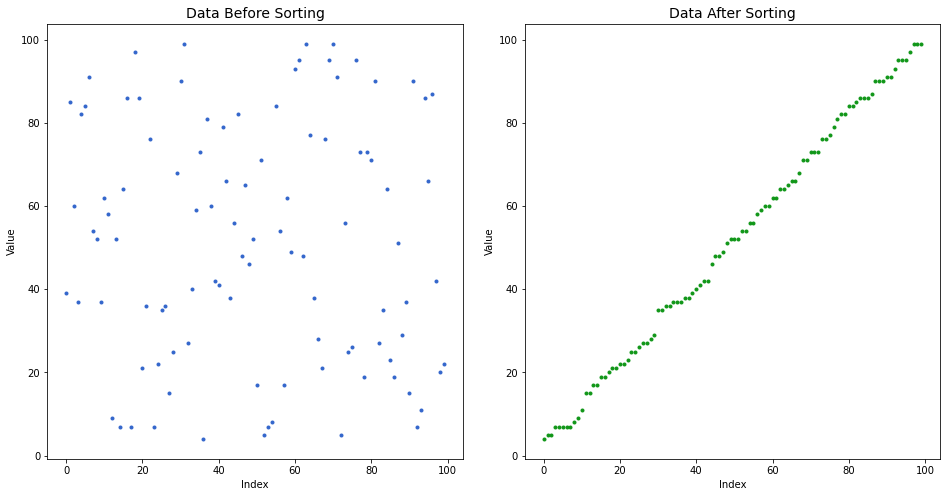

In [28]:
# Plotting
fig = plt.figure(figsize = (16, 8))
fig.subplots_adjust(hspace = 0.15, wspace = 0.15)

# Plotting results before sorting
plt.subplot(1, 2, 1)
plt.plot(raw_data, linewidth=0, marker="o", markersize=3, color="#3366cc")
plt.title("Data Before Sorting", fontsize = 14)
plt.ylabel('Value')
plt.xlabel('Index')

# Plotting results after sorting
plt.subplot(1, 2, 2)
plt.plot(sorted_data, linewidth=0, marker="o", markersize=3, color="#109618")
plt.title("Data After Sorting", fontsize = 14)
plt.ylabel('Value')
plt.xlabel('Index')
plt.show()

In [29]:
# Validation values
x_data = [0]
diff_raw_data = [0]
diff_sorted_data = [0]

for i in range(1, n):
    x_data.append(i)
    diff_raw_data.append(raw_data[i] - raw_data[i-1])
    diff_sorted_data.append(sorted_data[i] - sorted_data[i-1])

In [30]:
# Showing gap differences
raw_sum_abs = sum([abs(v) for v in diff_raw_data])
sorted_sum_abs = sum([abs(v) for v in diff_sorted_data])

print('Raw data - Gap sum:', raw_sum_abs)
print('Sorted data - Gap sum:', sorted_sum_abs)

Raw data - Gap sum: 3085
Sorted data - Gap sum: 95


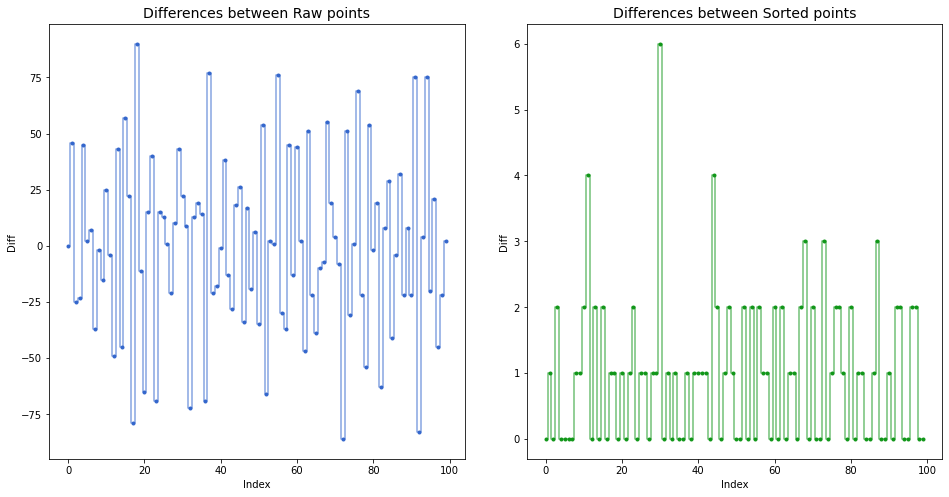

In [31]:
# Plotting
fig = plt.figure(figsize = (16, 8))
fig.subplots_adjust(hspace = 0.15, wspace = 0.15)

# Plotting results before sorting
plt.subplot(1, 2, 1)
plt.step(x_data, diff_raw_data, where='mid', color="#3366cc", alpha=0.6)
plt.plot(diff_raw_data, linewidth=0, marker="o", markersize=3, color="#3366cc")
plt.title("Differences between Raw points", fontsize = 14)
plt.ylabel('Diff')
plt.xlabel('Index')

# Plotting results after sorting
plt.subplot(1, 2, 2)
plt.step(x_data, diff_sorted_data, where='mid', color="#109618", alpha=0.6)
plt.plot(diff_sorted_data, linewidth=0, marker="o", markersize=3, color="#109618")
plt.title("Differences between Sorted points", fontsize = 14)
plt.ylabel('Diff')
plt.xlabel('Index')
plt.show()

Calculate the Standard Deviation of the residuals between the raw points:

In [32]:
# Calculate variance of the residuals
stats.stdev(diff_raw_data)

39.243877473969356

Calculate the Standard Deviation of the residuals between the sorted points:

In [33]:
# Calculate variance of the residuals
stats.stdev(diff_sorted_data)

1.0952145677879515

## 1.6. Convex Hull

In geometry, **the convex hull** or convex envelope or convex closure of a shape is the smallest convex set that contains it. For a bounded subset of the plane, the convex hull may be visualized as the shape enclosed by a rubber band stretched around the subset <a href="#link_seven">[7]</a>.

Formally, the convex hull may be defined either as the intersection of all convex sets containing a given subset of a Euclidean space, or equivalently as the set of all convex combinations of points in the subset. Convex hulls of open sets are open, and convex hulls of compact sets are compact. Every convex set is the convex hull of its extreme points.

In [34]:
# Example values
n = 1000
points = []

for i in range(n):
    x = int(random.random() * n)
    y = int(random.random() * n)
    points.append((x, y))

points = np.array(points)

Andrew’s monotone chain algorithm is used, which runs in $ \Theta(n \log_{}{n}) $ time in general, or $ \Theta(n) $ time if the input is already sorted <a href="#link_five">[5]</a>.

In [35]:
# Returns the convex hull, assuming that each points[i] <= points[i + 1]. Runs in O(n) time
def make_hull_presorted(points):
    if len(points) <= 1:
        return list(points)
    
    # Andrew's monotone chain algorithm
    upperhull = []
    lowerhull = []
    for hull in (upperhull, lowerhull):
        for p in (points if (hull is upperhull) else reversed(points)):
            while len(hull) >= 2:
                qx, qy = hull[-1]
                rx, ry = hull[-2]
                if (qx - rx) * (p[1] - ry) >= (qy - ry) * (p[0] - rx):
                    del hull[-1]
                else:
                    break
            hull.append(p)
        del hull[-1]
    
    if not (len(upperhull) == 1 and upperhull == lowerhull):
        upperhull.extend(lowerhull)
    
    return upperhull

# This algorithm runs in O(n log n) time
def convex_hull_greedy(points):
    sorted_points = sorted(points, key = lambda p: p[0])
    hull = make_hull_presorted(sorted_points)
    hull.append(hull[0])
    return hull

In [36]:
# Run algorithm
start_time = timeit.default_timer()
hull = convex_hull_greedy(points)
print('>> elapsed time', (timeit.default_timer() - start_time) * 1000, 'ms')

>> elapsed time 42.057800000000256 ms


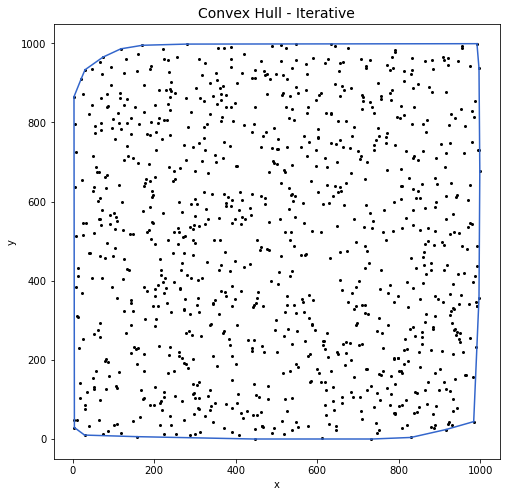

In [37]:
# Plotting convex hull results
plt.figure(figsize = (8, 8))
plt.plot(points[:,0], points[:,1], linewidth=0, marker="o", markersize=2, color="black")
for i in range(1, len(hull)):
    p1 = hull[i-1]
    p2 = hull[i]
    plt.plot([p1[0], p2[0]], [p1[1], p2[1]], color="#3366cc")

plt.title("Convex Hull - Iterative", fontsize = 14)
plt.ylabel('y')
plt.xlabel('x')
plt.show()

## 1.7. Changing Distribution

Practical example of the use of an algorithm to solve a specific problem.

### Creating a toy uniform distribution

In [38]:
# Initialize variables
n = 256
data_raw = [25] * n
total = sum(data_raw)
print('Total values:', total)

Total values: 6400


In [39]:
# Creating target distribution
alpha = 0.02
t_func = sci.norm(n/2, alpha*n)
x = np.linspace(0, n, n)
y = t_func.pdf(x) * total

In [40]:
# Create pretty x axis labels
def get_x_labels(n):
    x_labels = []
    for ix in range(n):
        if ix % 10 == 0:
            x_labels.append(str(ix))
        else:
            x_labels.append('')
    return x_labels

In [41]:
# Function that plots a symbol distribution
def plot_symbol_dist(data, x, y):
    
    # Prepare data
    n = len(data)
    y_pos = np.arange(n)
    symbols = get_x_labels(n)
    
    # Plot distribution
    plt.figure(figsize = (12, 5))
    plt.plot(x, y, '-', color = '#ff7f0e', lw = 3, label = 'Real distribution')
    plt.bar(y_pos, data, align='center', alpha=0.5)
    plt.xticks(y_pos, symbols, fontsize = 10, rotation = 50)
    plt.ylabel('Value')
    plt.title('Distribution')
    plt.show()

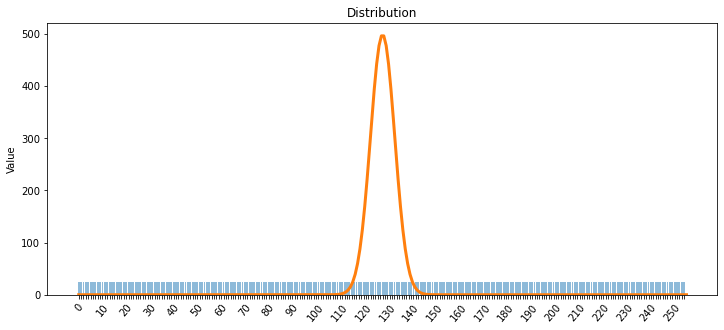

In [42]:
# Plot current distribution
plot_symbol_dist(data_raw, x, y)

### Calculate and plot new (Normal) distribution

In [43]:
# Function that calculates the new distribution
def get_new_dist(data_raw, y):
    a = []
    b = []
    n = len(data_raw)
    
    carry = 0
    for i in range(n // 2):
        y1 = data_raw[i] + carry
        y2 = max(math.floor(y[i]), 1)
        y_new = min(y1, y2)
        a.append(y_new)
        carry = y1 - y_new
    print('Forward carry:', carry)
    
    for i in range(n - 1, n // 2 - 1, -1):
        y1 = data_raw[i] + carry
        y2 = max(math.floor(y[i]), 1)
        y_new = min(y1, y2)
        b.append(y_new)
        carry = y1 - y_new    
    print('backward carry:', carry)
    
    # Concatenate arrays
    data_new = a + b[::-1]
    return data_new

In [44]:
data_new = get_new_dist(data_raw, y)
print('n temp:', len(data_new))

Forward carry: 0
backward carry: 0
n temp: 256


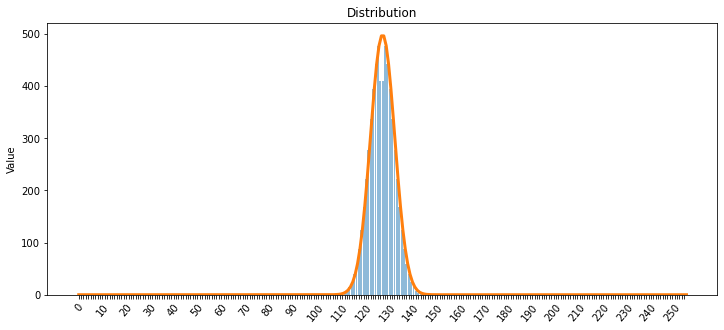

In [45]:
plot_symbol_dist(data_new, x, y)

Validation:

In [46]:
# Difference between distributions
print('>> diff:', total - sum(data_new))

>> diff: 0


## References

<a name='link_one' href='https://en.wikipedia.org/wiki/Algorithm' target='_blank' >[1]</a> Wikipedia - Algorithm.  
<a name='link_two' href='https://en.wikipedia.org/wiki/Greatest_common_divisor' target='_blank' >[2]</a> Wikipedia - Greatest common divisor.  
<a name='link_three' href='https://en.wikipedia.org/wiki/Tower_of_Hanoi' target='_blank' >[3]</a> Wikipedia - Tower of Hanoi.  
<a name='link_four' href='https://en.wikipedia.org/wiki/Integer_factorization' target='_blank' >[4]</a> Wikipedia - Integer factorization.  
<a name='link_five' href='https://en.wikipedia.org/wiki/Bubble_sort' target='_blank' >[5]</a> Wikipedia - Bubble sort.  
<a name='link_six' href='https://en.wikipedia.org/wiki/Convex_hull' target='_blank' >[6]</a> Wikipedia - Convex hull.  
<a name='link_seven' href='https://www.nayuki.io/page/convex-hull-algorithm' target='_blank' >[7]</a> Andrew’s monotone chain algorithm.  

---
<a href="https://ansegura7.github.io/Algorithms/">« Home</a>